In [ ]:
print("Ho")

In [ ]:
from ipyblender_experimental import Counter

Counter()

Fra:1 Mem:14.13M (Peak 14.13M) | Time:00:00.00 | Syncing Light
Fra:1 Mem:14.13M (Peak 14.13M) | Time:00:00.00 | Syncing Camera
Fra:1 Mem:14.13M (Peak 14.13M) | Time:00:00.00 | Syncing Camera.001
Fra:1 Mem:14.13M (Peak 14.13M) | Time:00:00.00 | Syncing light
Fra:1 Mem:14.13M (Peak 14.13M) | Time:00:00.00 | Syncing Camera.002
Fra:1 Mem:14.13M (Peak 14.13M) | Time:00:00.00 | Syncing light.001
Fra:1 Mem:14.13M (Peak 14.13M) | Time:00:00.00 | Syncing Camera.003
Fra:1 Mem:14.13M (Peak 14.13M) | Time:00:00.00 | Syncing light.002
Fra:1 Mem:14.13M (Peak 14.13M) | Time:00:00.00 | Syncing Camera.004
Fra:1 Mem:14.13M (Peak 14.13M) | Time:00:00.00 | Syncing light.003
Fra:1 Mem:14.13M (Peak 14.13M) | Time:00:00.00 | Syncing Camera.005
Fra:1 Mem:14.13M (Peak 14.13M) | Time:00:00.00 | Syncing light.004
Fra:1 Mem:14.13M (Peak 14.13M) | Time:00:00.00 | Syncing Camera.006
Fra:1 Mem:14.13M (Peak 14.13M) | Time:00:00.00 | Syncing light.005
Fra:1 Mem:14.13M (Peak 14.13M) | Time:00:00.00 | Syncing Camera.007

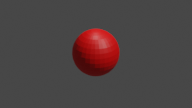

In [15]:
import bpy
from IPython.display import display, Image

# Clear all existing mesh objects
bpy.ops.object.select_all(action='DESELECT')
bpy.ops.object.select_by_type(type='MESH')
bpy.ops.object.delete()

# Create a new sphere mesh
bpy.ops.mesh.primitive_uv_sphere_add(radius=1, enter_editmode=False, align='WORLD', location=(0, 0, 0))
sphere = bpy.context.active_object

# Create a red material
red_material = bpy.data.materials.new(name="Red Material")
red_material.use_nodes = True
nodes = red_material.node_tree.nodes
nodes["Principled BSDF"].inputs["Base Color"].default_value = (1, 0, 0, 1)  # RGBA for red

# Assign the red material to the sphere
sphere.data.materials.append(red_material)

# Setup the camera
camera = bpy.data.cameras.new("Camera")
camera_obj = bpy.data.objects.new("Camera", camera)
bpy.context.collection.objects.link(camera_obj)
camera_obj.location = (0, -5, 0)  # Position the camera in front of the sphere
camera_obj.rotation_euler = (1.5708, 0, 0)  # Point the camera towards the sphere

# Setup lighting
light_data = bpy.data.lights.new(name="light", type='POINT')
light_object = bpy.data.objects.new(name="light", object_data=light_data)
bpy.context.collection.objects.link(light_object)
light_object.location = (0, 0, 3)

# Render settings
bpy.context.scene.render.resolution_x = 192
bpy.context.scene.render.resolution_y = 108
bpy.context.scene.render.image_settings.file_format = 'PNG'
bpy.context.scene.render.filepath = "test.png" 

# Render the image
bpy.ops.render.render(write_still=True)

# Save the image to the specified filepath
bpy.data.images['Render Result'].save_render(filepath=bpy.context.scene.render.filepath)

Image(filename='test.png')
